# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** first name and last name  
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [197]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

In [3]:
import skimage
from skimage.io import imread_collection
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion

In [195]:
# Necessary libraries
import cv2
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [308]:
def find_fourier_descriptor(img, l = 1):
    """
    Find the l-th fourier descriptor for given img
    Params: img: np.array
            l: int
    Return: (x, y)
    """

    # Get test img
    test_img = img

    # Convert gray img to binary img
    thrs = (test_img > 0) * 255
    thrs = thrs.astype(np.uint8)

    # Find contour
    contours, hier = cv2.findContours(thrs, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # For simplicity we only take the longest contour
    contour = sorted(contours, key = lambda x: len(x))[-1]

    # Normalization
    contour = contour.reshape(-1, 2).T

    contour -= np.mean(contour, axis = 1).astype(np.int).reshape(2, 1)

    # Get length of contour
    N = len(contour[0])

    # Get real part of contour
    real = contour[0]

    # Get imaginary part of contour
    imginary = contour[1] * 1j

    # Build Fourier descriptor for the contour

    # First Fourier descriptor
    f1 = np.sum((real + imginary) * np.exp(2 * np.pi * 1j / N * np.arange(N)))

    # Second Fourier descriptor
    # f2 = np.sum((real + imginary) * np.exp(2 * np.pi * 1j / N * np.arange(0, 2 * N, 2)))

    # Return real and imaginary part of f1
    return f1.real, f1.imag

In [309]:
# Get 1st fourier descriptor for all img with label zero
zero_f1 = np.asarray([find_fourier_descriptor(img) for img in zeros_im])

In [310]:
# Get 1st fourier descriptor for all img with label one
one_f1 = np.asarray([find_fourier_descriptor(img) for img in ones_im])

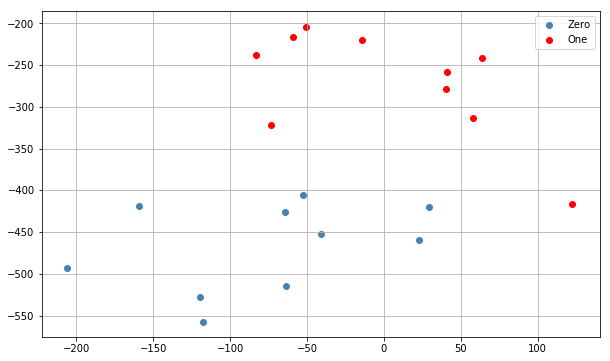

In [311]:
# Visualize the results
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.scatter(zero_f1[:, 0], zero_f1[:, 1], c = 'steelblue', label = 'Zero')
ax.scatter(one_f1[:, 0], one_f1[:, 1], c = 'red', label = 'One')
ax.legend()
ax.grid(True)

To check the robustness of our feature generator, we conduct rotation to the img. Notice that translation is not necessary since we have done normalization in our implementation.

In [312]:
# Get center 
center = zeros_im[0].shape
center = (center[0] / 2, center[1] / 2)

In [313]:
def rotate_img(img, deg = 90):
    """
    Rotate img by given deg
    Param:  img: np.array
            deg: int
    Return: rorated_img: np.array
    """
    
    # Get center of image
    center = img.shape
    center = (center[0] / 2, center[1] / 2)
    
    return cv2.warpAffine(img, cv2.getRotationMatrix2D(center, deg, 1.0), img.shape)

In [196]:
# Rotation
rotated_zeros_im = [rotate_img(img, deg) for img in zeros_im \
                                           for deg in [90, 180, 270]]

rotated_ones_im = [rotate_img(img, deg) for img in ones_im \
                                          for deg in [90, 180, 270]]

NameError: name 'rotate_img' is not defined

In [315]:
# Compute f1 for augmented zeros images
zero_f1_aug = np.asarray([find_fourier_descriptor(img) for img in rotated_zeros_im + list(zeros_im)])

# Compute f1 for augmented ones images
one_f1_aug = np.asarray([find_fourier_descriptor(img) for img in rotated_ones_im + list(ones_im)])

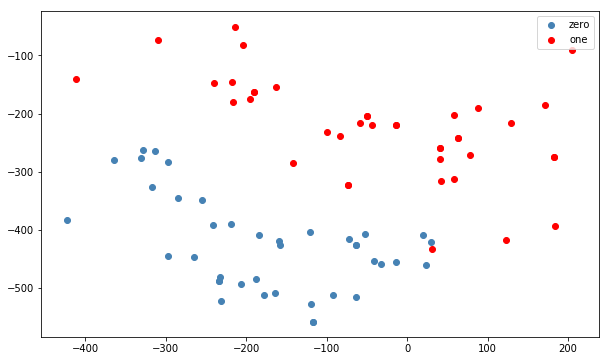

In [316]:
# Visualize the results
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.scatter(zero_f1_aug[:, 0], zero_f1_aug[:, 1], c = 'steelblue', label = 'zero')
ax.scatter(one_f1_aug[:, 0], one_f1_aug[:, 1], c = 'red', label = 'one')
ax.legend()

### 1.3 Additional method(s)
Add your implementation and discussion

In [24]:
# Import necessary libraries
import keras
from keras.layers import Dense
from keras import activations
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

from sklearn.decomposition import PCA

### 1.3.1 PCA

We begin with linear dimensionality reduction, namely PCA.

The flatted img is regarded as the original features.

In [329]:
# Flat imgs
flatten_zeros = [img.flatten() for img in list(zeros_im) + rotated_zeros_im]

flatten_ones = [img.flatten() for img in list(ones_im) + rotated_ones_im]

In [330]:
# Conduct PCA
pca = PCA(n_components = 2)

results = pca.fit_transform(flatten_zeros + flatten_ones)

projected_zeros = results[: len(flatten_zeros)]

projected_ones = results[len(flatten_ones): ]

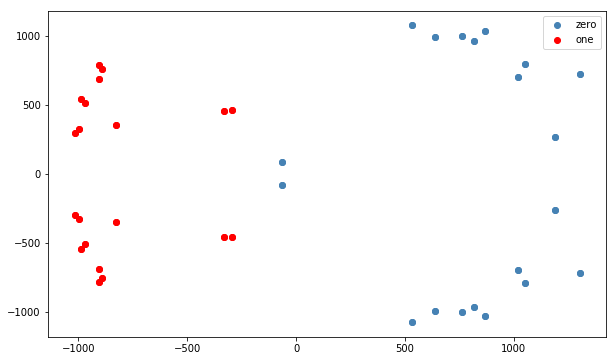

In [331]:
# Visualize
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.scatter(projected_zeros[:, 0], projected_zeros[:, 1], c = 'steelblue', label = 'zero')
ax.scatter(projected_ones[:, 0], projected_ones[:, 1], c = 'red', label = 'one')
ax.legend()

### 1.3.2 Single layer ANN

In [5]:
rotated_zeros_im = [img.T[: : -1, : :] for img in zeros_im] + \
                    [img[: : -1, : : -1] for img in zeros_im] + \
                    [img.T[: :, : : -1] for img in zeros_im]

In [6]:
rotated_zeros_im += list(zeros_im)

In [7]:
rotated_ones_im = [img.T[: : -1, : :] for img in ones_im] + \
                    [img[: : -1, : : -1] for img in ones_im] + \
                    [img.T[: :, : : -1] for img in ones_im]

In [8]:
rotated_ones_im += list(ones_im)

In [172]:
# Build model
# This trivial model is collected from the internet
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax')) # This special "softmax" activation among other things,

model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [169]:
# Build x
x = np.asarray((rotated_zeros_im + rotated_ones_im)).reshape((-1, zeros_im[0].shape[0] * \
                                                                     zeros_im[0].shape[1]))

# Normalize x 
x = x / 255
x -= np.mean(x)
x /= np.std(x)

In [170]:
# Build y
y = np.asarray([0] * len(rotated_zeros_im) + [1] * len(rotated_ones_im))

# Convert y to categorical
y = np_utils.to_categorical(y, 2)

In [171]:
# Shuffle data
mask = np.random.permutation(len(x))

x = x[mask]
y = y[mask]

In [174]:
# Train
model.fit(x, y, epochs = 10)

Epoch 1/10
80/80 [==============================] - 0s 445us/step - loss: 3.2340e-08 - acc: 1.0000
Epoch 2/10
80/80 [==============================] - 0s 438us/step - loss: 7.5511e-07 - acc: 1.0000
Epoch 3/10
80/80 [==============================] - 0s 486us/step - loss: 1.2380e-08 - acc: 1.0000
Epoch 4/10
80/80 [==============================] - 0s 543us/step - loss: 8.4531e-10 - acc: 1.0000
Epoch 5/10
80/80 [==============================] - 0s 616us/step - loss: 1.8766e-08 - acc: 1.0000
Epoch 6/10
80/80 [==============================] - 0s 607us/step - loss: 2.0788e-10 - acc: 1.0000
Epoch 7/10
80/80 [==============================] - 0s 560us/step - loss: 5.6586e-07 - acc: 1.0000
Epoch 8/10
80/80 [==============================] - 0s 663us/step - loss: 4.0469e-09 - acc: 1.0000
Epoch 9/10
80/80 [==============================] - 0s 568us/step - loss: 2.3232e-09 - acc: 1.0000
Epoch 10/10
80/80 [==============================] - 0s 550us/step - loss: 6.2540e-09 - acc: 1.0000


In [176]:
# Get last layer as feature vector
feature_vec = model.predict_proba(x)

In [191]:
# Get zero and one feature vectors

zero_feature_vec = feature_vec[y[::, 1] == 0]

one_feature_vec = feature_vec[y[::, 1] == 1]

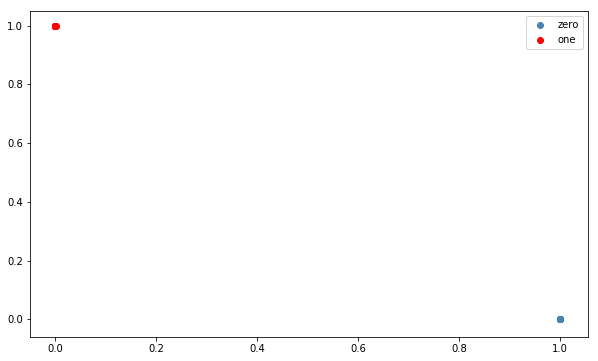

In [193]:
# Visualize feature vector
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.scatter(zero_feature_vec[::, 0], zero_feature_vec[::, 1], c = 'steelblue', label = 'zero')
ax.scatter(one_feature_vec[::, 0], one_feature_vec[::, 1], c = 'red', label = 'one')
ax.legend()

Notice that this feature encoding seems to be perfect. This is due to the lack of training data, which may lead to severe overfitting.

This disadvantage can be overcome by bringing more data. As the success of neural network on recognition on MNIST dataset shows, with sufficient amount of data, we can encode the figures to any dimension properly.